In [1]:
# Import and configure modules
# Scikit-learn                  # for non deep machine learning methods
import sys
import numpy as np                      # for data storage & manipulation
import pickle
import pandas as pd                     # for data parsing & manipulation
import math
import os, cv2, glob
import argparse
import pandas as pd
import tensorflow as tf             # for deep learning
from matplotlib import pyplot as plt    # for plotting
from collections import Counter


In [88]:
#Set paths
db_dir = "/mnt/home/n10203478/EGH400/database/"
db_dir = "../../../database"  
# p2p_dir = "../../../CrowdCounting-P2PNet/"
p2p_dir = '../'#"/home/n10203478/EGH400/koaladetection/CrowdCounting-P2PNet" #../"
old_p2p_dir = "../../../CrowdCounting-P2PNet/"
old_db_dir = "../../../database_del"

alphabet_set = list(map(chr, range(97, 123)))

In [89]:
# Read gt .txt files and save in gt_train, gt_test
with open(os.path.join(db_dir,"train_gt.txt")) as load_file:
    gt_train = [tuple(line.split()) for line in load_file]

with open(os.path.join(db_dir,"test_gt.txt")) as load_file:
    gt_test = [tuple(line.split()) for line in load_file]

with open(os.path.join(old_db_dir,"train_gt.txt")) as load_file:
    old_gt_train = [tuple(line.split()) for line in load_file]

with open(os.path.join(old_db_dir,"test_gt.txt")) as load_file:
    old_gt_test = [tuple(line.split()) for line in load_file]

tot = ['train','test']
train_test = [gt_train, gt_test]

len(gt_test)

935

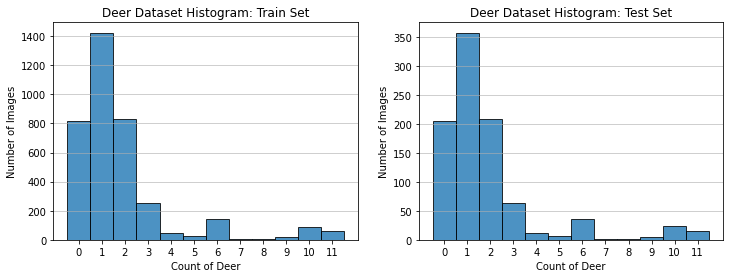

In [4]:
#TRAINING & TESTING SET HISTOGRAM
def column(matrix, i):
    return [row[i] for row in matrix]


fig=plt.figure(figsize=[12,4])
for i in range(2):
    values = list(map(int,(column(train_test[i],1))))
    hist, bin_edges = np.histogram(values, 12, range=(0, 12))
    width = (bin_edges[1] - bin_edges[0])

    ax=fig.add_subplot(1, 2, i+1)
    plt.setp(ax, xticks=list(set(values)))
    plt.grid(axis='y', alpha=0.75)
    plt.bar(bin_edges[:-1], hist, align='center', width=width, edgecolor='k', alpha=0.8)
    plt.title('Deer Dataset Histogram: {} Set'.format(tot[i].capitalize()))
    plt.xlabel('Count of Deer')
    plt.ylabel('Number of Images')

# plt.figtext(0.3, -0.05, "a) Training Set", wrap=True, horizontalalignment='center', fontsize=12)
# plt.figtext(0.75, -0.05, "b) Validation Set", wrap=True, horizontalalignment='center', fontsize=12)

In [5]:
# Display counts - don't need to run
c_test = Counter(elem[1] for elem in gt_test)
c_train = Counter(elem[1] for elem in gt_train)
for i in range(12):
    print("{}:".format(str(i)), c_train[str(i)], c_test[str(i)], c_train[str(i)]+c_test[str(i)])
    # print("Yes:", c['1'])
    # print("No:", c['0'])
(len(gt_test)+len(gt_train))

0: 818 205 1023
1: 1424 357 1781
2: 832 209 1041
3: 250 63 313
4: 45 12 57
5: 25 7 32
6: 140 36 176
7: 3 1 4
8: 4 2 6
9: 18 5 23
10: 87 23 110
11: 59 15 74


4640

In [6]:
# >> WARNING: TAKES ABOUT 8 MINUTES << Store filename, gt count, and image for each .png in test set 
test_array=[]
for file in glob.glob(os.path.join(db_dir,"test/*.png")): 
    img = cv2.imread(file)
    filename = os.path.basename(file)#.split(".")[0]    
    pre = filename.split(".")[0]    
    
    for line in gt_test:
        if line[0] == filename:
            count = line[1]
            test_array.append(tuple([pre,count,img]))   

len(test_array)

935

In [372]:
# #CAN SKIP
# #obtain p2pnet output pred imgs and pred count
# p2pout=[]
# for file in glob.glob("./run1/train/*.jpg"): 
#     filename = os.path.basename(file).split(".")[0]     
#     img_name = filename.split("pred")[0]   
#     if img_name in fnames:
#             img = cv2.imread(file)
#             pred = filename.split('pred')[1]
#             p2pout.append((img_name, img, pred))
#             print(img_name, pred)

# #alternatively, obtain p2p prediction from txt file.
# for rpm in fnames:
#     for line in open(pr_train_path,'r'):
#         if rpm in line:
#             print(line)

In [373]:
# #obtain all p2pnet output pred imgs and pred count
# p2pout_all=[]
# for file in glob.glob("./run1/test/*.jpg"): 
#     filename = os.path.basename(file).split(".")[0]     
#     img_name = filename.split("pred")[0] + ".png"
#     img = cv2.imread(file)

#     pred = filename.split('pred')[1]
#     p2pout_all.append((img_name, img))
#     # print(img_name, pred)

In [7]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

[314 555 415 694 313 627 515 852]


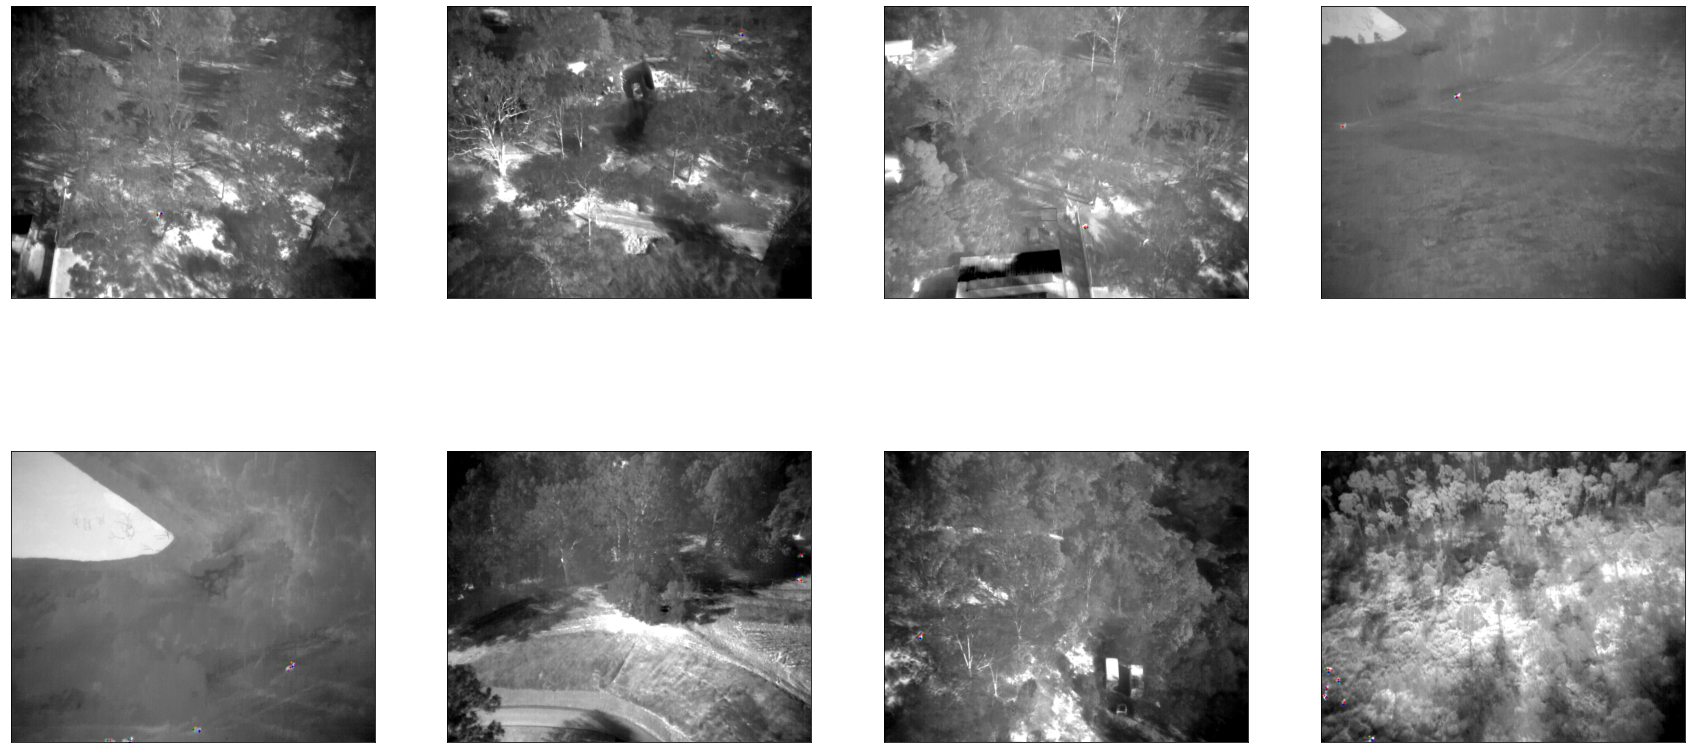

In [16]:
num = 8
randnums= np.random.randint(300,len(test_array),num)
colors = ['c','m','g','tab:orange','b']

print(randnums)
fig = plt.figure(figsize=[30, 15])
for i in range(num):
    x = randnums[i]
    pts=[]
    # points1_pth = find(test_array[x][0]+".txt","../../koaladetection/CrowdCounting-P2PNet/vis/testest2")
    for z in range(5): 
        pts_path = (os.path.join(p2p_dir,"vis","run_"+str(z+1),test_array[x][0]+'.txt'))

        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])
            
    gt_pth = os.path.join(db_dir,"test",test_array[x][0]+'.txt')

    with open(gt_pth) as load_file:
        gt_points = [(line.split()) for line in load_file]

    # draw the predictions
    img_to_draw = cv2.cvtColor((test_array[x][2]), cv2.COLOR_BGR2RGB)

    ax = fig.add_subplot(2, 4, i + 1) #<---------------
    # ax.imshow(cv2.cvtColor(test_array[x][2],cv2.COLOR_BGR2RGB))COLOR_RGB2BGR

    plt.setp(ax, xticks=[], yticks=[])
    # plt.imshow(img_to_draw)
    
    for z in range(5):
        for p in pts[z]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            plt.scatter(x, y, c=colors[z], s=1)#cv2.circle(img_to_draw, (x,y), size, (0, 0, 255), -1) #RED

    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        plt.scatter(x, y, c='r', s=1)

    # plt.scatter(x=[0.95078125*640, 0.959375*640], y=[0.4111328125*512, 0.5*512], c='r', s=1)
    plt.imshow(img_to_draw)
    # ax.axis('off') 

# fig.subplots_adjust(hspace=0.0)
fig.savefig('TESTING4.png', dpi=450)

Plot point predictions from different trains

In [35]:
def plot_run_preds(k):
    # k = 820#820, randnums[0]#809
    size = 1

    # colors = ['c','m','g','tab:orange','b']
    colors = [[0, 255, 0], [0, 0, 255],[0, 255, 255],[255, 0, 255],[255, 255, 0]]     # lime, blue, cyan, magenta yellow

    # for img in test_array:
    gt_pth = os.path.join(db_dir,"test",test_array[k][0]+'.txt')

    pts = []
    img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
    for i in range(5): 
        pts_path = (os.path.join(p2p_dir,"vis","run_"+str(i+1),test_array[k][0]+'.txt'))
        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])

    for i in range(5): 
        for p in pts[i]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            img_to_draw=cv2.circle(img_to_draw, (x, y), size, colors[i], -1)

    with open(gt_pth) as load_file:
        gt_points = [(line.split()) for line in load_file]

    for p in gt_points:
        x = int(float(p[1])*640)
        y = int(float(p[2])*512)
        img_to_draw=cv2.circle(img_to_draw, (x,y), size, (255, 0, 0), -1)

    fig = plt.figure(figsize=[8, 8])
    plt.imshow(img_to_draw)

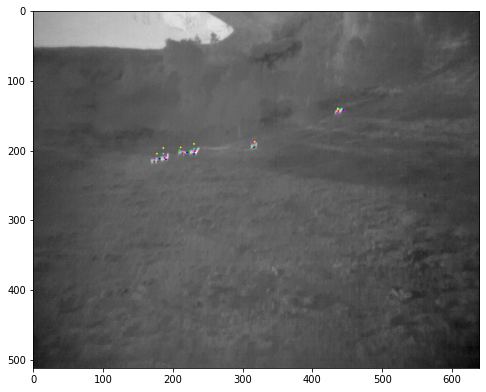

In [46]:
plot_run_preds(860)

DBSCAN

In [39]:
#import additional modules
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [109]:
def cluster_img(k, eps=5, min_samples = 3, img=True): #outputs filename, no.clusters, mean co-ords
    pts = [] 
    X = [] 
    filename = test_array[k][0]+".png"

    # Obtain pred points from all 5 trains and store in array X
    for i in range(5): 
        pts_path = (os.path.join(p2p_dir,"vis","run_"+str(i+1),test_array[k][0]+'.txt'))
        with open(pts_path) as load_file:
            pts.append([(line.split()) for line in load_file])

    for i in range(5): 
        for p in pts[i]:
            x = int(float(p[0])*640)
            y = int(float(p[1])*512)
            X.append([x,y])
    X = np.array(X)


    # Return pred count of 0 if X is empty & skip clustering
    if X.size < 1:
        K=0
        return[filename, 0]

    else:
        clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = clustering.labels_ # measure the performance of dbscan algo
        K = len(set(labels)) - (1 if -1 in labels else 0) # number of clusters

        # Find Cluster means 
        means = np.array([X[labels == i].mean(axis=0) for i in range(0, K)])
        means = means.astype(int)

        if img:
            # Initialise image to draw
            img_to_draw = cv2.cvtColor((test_array[k][2]), cv2.COLOR_BGR2RGB)
                
            # Obtain gt points & plot
            gt_pth = os.path.join(db_dir,"test",test_array[k][0]+'.txt')

            with open(gt_pth) as load_file:
                gt_points = [(line.split()) for line in load_file]

            for p in gt_points:
                x = int(float(p[1])*640)
                y = int(float(p[2])*512)
                img_to_draw=cv2.circle(img_to_draw, (x,y), 2, (255, 0, 0), -1)

            # Plot
            fig = plt.figure(figsize=[20, 5])
            ax = fig.add_subplot(1, 3, 1)
            ax.imshow(img_to_draw)
            ax.scatter(X[:,0], X[:,1], s=1, c='tab:orange') # plot all pred points
            ax.xlabel("a)",fontsize=12)
            ax.axis('off') 

            ax = fig.add_subplot(1, 3, 2)
            ax.scatter(X[:,0], X[:,1], c=clustering.labels_) # plot cluster vis
            ax.xlabel("b)",fontsize=12)
            ax.axis('on') 

            # fig = plt.figure(figsize=[6, 6])
            ax = fig.add_subplot(1, 3, 3)
            ax.imshow(img_to_draw)
            ax.scatter((np.array(means)[:,0]), (np.array(means)[:,1]), s=3, c='tab:cyan') # plot consensus detections
            ax.xlabel("c)",fontsize=12)            
            ax.axis('off') 

            print("Gt count: {}".format(len(gt_points)))
            print("No. clusters: {}".format(K))
    return[filename, K, means]


## Evaluation metrics
# sc = metrics.silhouette_score(X, clustering.labels_)
# print("Silhouette Coefficient:%0.3f"%sc)


Gt count: 6
No. clusters: 5


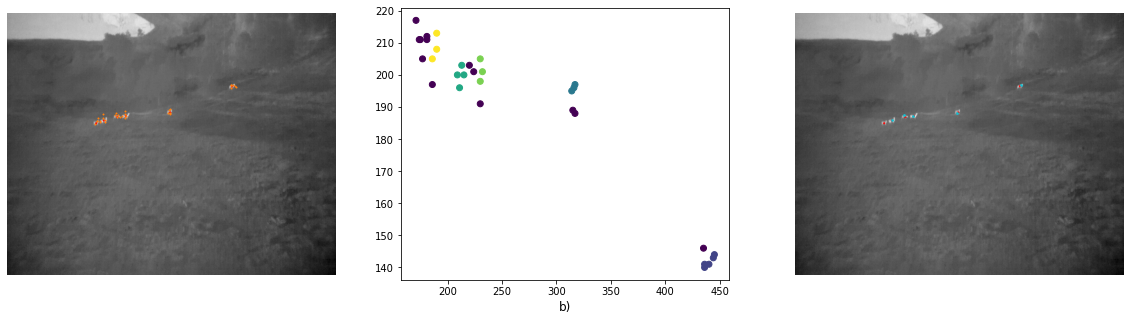

In [110]:
f, kk, mm =cluster_img(860,5,3)
#e.g. k=860

In [48]:
cluster_points=[]
# cluster(860, 5, min_samples = 3)
for m in range(len(gt_test)):
    cluster_points.append(cluster_img(m, 5, min_samples = 3, img=False))

cluster_points[0]

['Flight1_20190820_02619.png', 0]

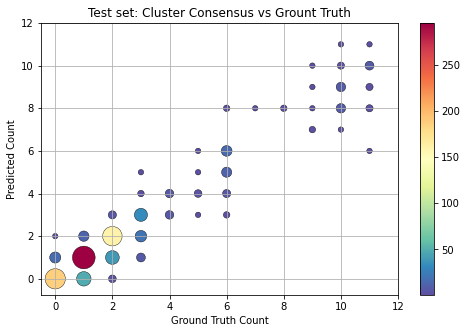

Accuracy: 19.00134952766532 %
MSE: 0.43636363636363634
MAE: 0.3016042780748663


In [118]:
#cluster test set
fig=plt.figure(figsize=[8,5])

gt_path=os.path.join(db_dir,"test_gt.txt")

gt_points = []
for line in gt_test:
    filename = (line[0])
    count = int(line[1])
    gt_points.append([filename, count])

gt_points_sorted = sorted(gt_points, key=lambda tup: tup[0])
cluster_pts_sorted = sorted(cluster_points, key=lambda tup: tup[0])

test_x=column(gt_points_sorted, 1)
test_y=column(cluster_pts_sorted, 1) 
#Generate a list of unique points
points=list(set(zip(test_x,test_y))) 
#Generate a list of point counts
count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]
#Now for the plotting:
plot_x=[i[0] for i in points]
plot_y=[i[1] for i in points]
count=np.array(count)

ax=fig.add_subplot(1, 1, 1)
plt.xlim(-0.5, max(test_x)+1)
plt.ylim(-0.75, max(test_y)+1)
plt.scatter(plot_x,plot_y,c=count,s=30*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
plt.colorbar()
plt.xlabel('Ground Truth Count')
plt.ylabel('Predicted Count')
plt.title("Test set: Cluster Consensus vs Grount Truth")
plt.grid()
plt.show()

g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])

print("Accuracy: {} %".format(correct/len(gt_train)*100))
print("MSE: {}".format(metrics.mean_squared_error(test_x,test_y)))
print("MAE: {}".format(metrics.mean_absolute_error(test_x, test_y)))

P2PNet Model Train vs Test

In [ ]:
#https://stackoverflow.com/questions/32687826/how-can-i-account-for-identical-data-points-in-a-scatter-plot
pr_train_path = os.path.join(old_p2p_dir,"vis","run1","train","p2p_train_pr.txt")
pr_test_path = os.path.join(old_p2p_dir,"vis","run1","test","p2p_test_pr.txt")

g_names=["Test", "Train"]
gt_paths = (os.path.join(db_dir,"test_gt.txt"),os.path.join(db_dir,"train_gt.txt"))
p2p_pr_paths = (pr_test_path, pr_train_path)

fig=plt.figure(figsize=[18,5])

for x in range(2):
    gt_path=gt_paths[x]
    p2p_pr_path = p2p_pr_paths[x]

    p2p_pr_points = []
    with open(p2p_pr_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            p2p_pr_points.append([filename, count])

    gt_points = []
    with open(gt_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            gt_points.append([filename, count])

    gt_points_sorted = sorted(gt_points, key=lambda tup: tup[0])
    p2p_pr_points_sorted = sorted(p2p_pr_points, key=lambda tup: tup[0])

    test_x=column(gt_points_sorted, 1)
    test_y=column(p2p_pr_points_sorted, 1) #  I am just generating some test x and y values. Use your data here

    points=list(set(zip(test_x,test_y))) 
    count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

    plot_x=[i[0] for i in points]
    plot_y=[i[1] for i in points]
    count=np.array(count)

    ax=fig.add_subplot(1, 2, x+1)
    plt.xlim(-0.5, max(test_x)+1)
    plt.ylim(-0.75, max(test_y)+1)
    if x==0:
        plt.scatter(plot_x,plot_y,c=count,s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
    else:
        plt.scatter(plot_x,plot_y,c=count,s=15*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))
    plt.colorbar()
    plt.xlabel('Ground Truth Count\n {})'.format(alphabet_set[x]),fontsize=12)
    plt.ylabel('Predicted Count')
    plt.title(g_names[x]+ " set: P2PNet Predicted vs Ground Truth")
    plt.grid()
plt.show()

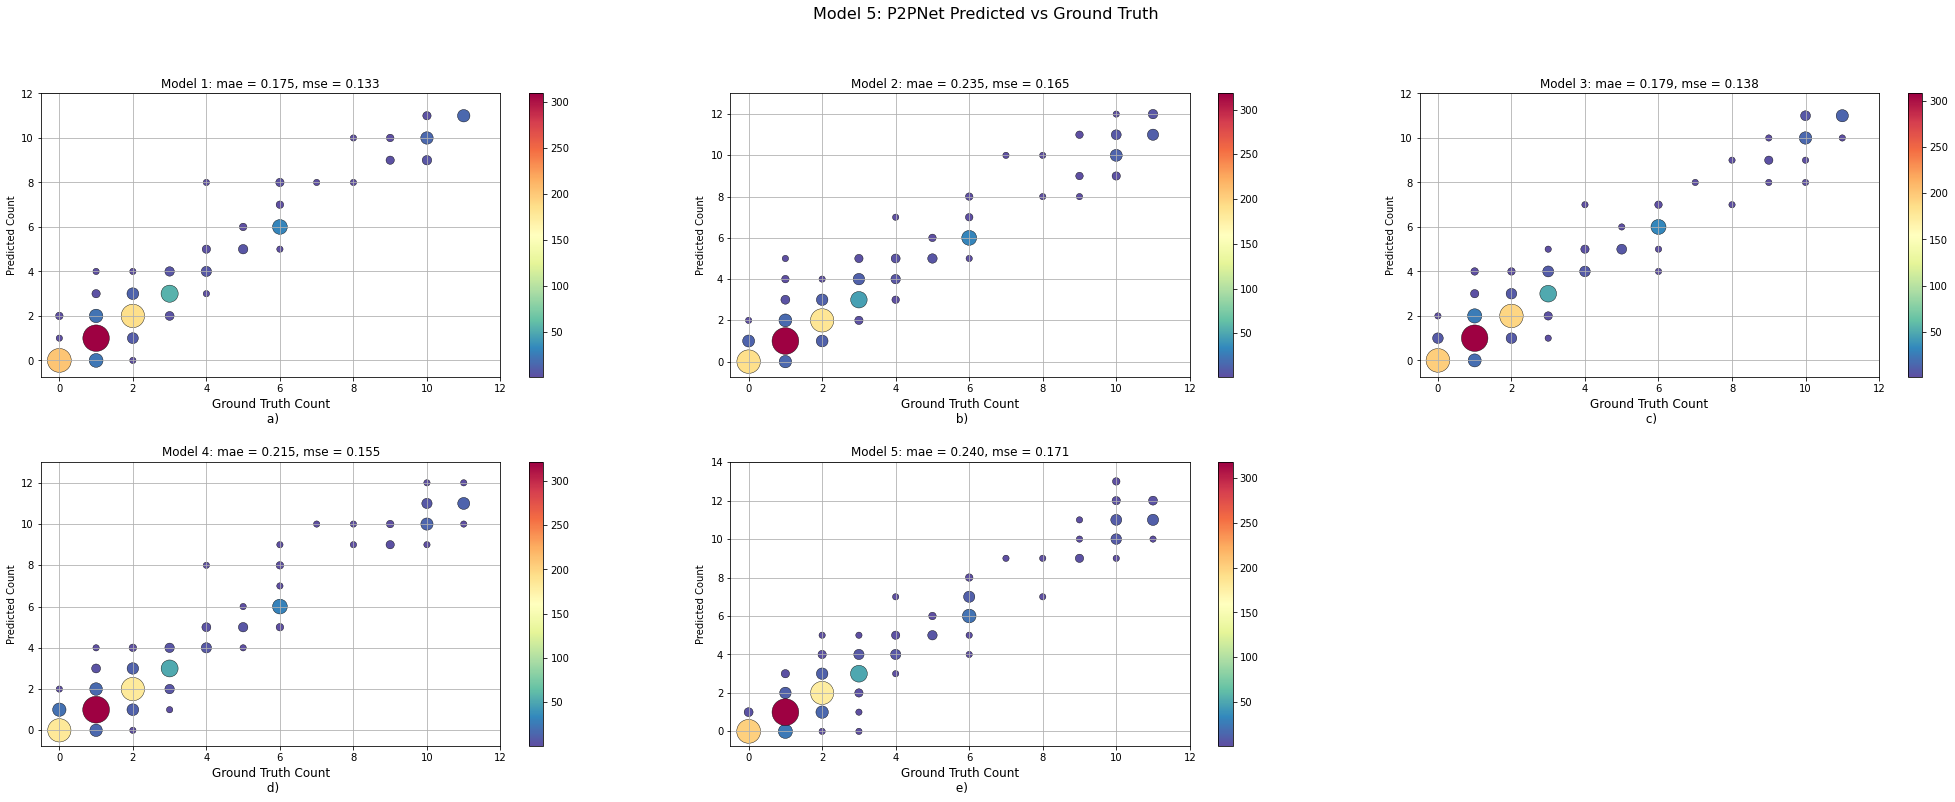

In [149]:
#scatterplot for all 5 trains

fig=plt.figure(figsize=[35,12])

gt_path=os.path.join(db_dir,"test_gt.txt")

gt_points = []
with open(gt_path) as f_label:
    for line in f_label:
        stripped_line = line.strip().split(' ')
        filename = ((stripped_line[0])) 
        count = (float(stripped_line[1])) 
        gt_points.append([filename, count])

gt_points_sorted = sorted(gt_points, key=lambda tup: tup[0])
test_x=column(gt_points_sorted, 1)

for x in range(5):
    p2p_pr_path = os.path.join(p2p_dir,"vis","run_"+str(x+1),"p2p_test_pr.txt")

    p2p_pr_points = []
    with open(p2p_pr_path) as f_label:
        for line in f_label:
            stripped_line = line.strip().split(' ')
            filename = ((stripped_line[0])) 
            count = (float(stripped_line[1])) 
            p2p_pr_points.append([filename, count])

    p2p_pr_points_sorted = sorted(p2p_pr_points, key=lambda tup: tup[0])

    test_y=column(p2p_pr_points_sorted, 1) #  I am just generating some test x and y values. Use your data here

    points=list(set(zip(test_x,test_y))) 
    count=[len([x for x,y in zip(test_x,test_y) if x==p[0] and y==p[1]]) for p in points]

    plot_x=[i[0] for i in points]
    plot_y=[i[1] for i in points]
    count=np.array(count)

    ax=fig.add_subplot(2, 3, x+1)
    plt.xlim(-0.5, max(test_x)+1)
    plt.ylim(-0.75, max(test_y)+1)
    plt.scatter(plot_x,plot_y,c=count,s=40*count**0.5,cmap='Spectral_r', linewidths=0.4, edgecolors=(0,0,0))

    mae = metrics.mean_squared_error(test_x,test_y)
    mse = metrics.mean_absolute_error(test_x,test_y)

    plt.colorbar()
    plt.xlabel('Ground Truth Count\n {})'.format(alphabet_set[x]),fontsize=12)
    plt.ylabel('Predicted Count')
    plt.title("Model {}: mae = {:.3f}, mse = {:.3f}".format(x+1,mae,mse), fontsize=12)
    plt.grid()
fig.suptitle("Model {}: P2PNet Predicted vs Ground Truth".format(x+1), fontsize=16)
fig.subplots_adjust(hspace=.3)

plt.show()

In [53]:
g = zip(plot_x, plot_y, count)
g = list(sorted(g,key=lambda b: b[0]))
# print(tuple(g))

correct = 0
for j in range(len(g)):
    if tuple(g[j])[0]==tuple(g[j])[1]:
        correct+=(tuple(g[j])[2])
correct/len(gt_train)*100

20.529443544030254

IGNORE BELOW


Progress Report Visualisations

In [ ]:
#Import additional modules
import matplotlib.patches as patches
from matplotlib import rc

In [113]:
# Define paths for p2p pred txt files
p2p_dir = old_p2p_dir
db_dir = old_db_dir
p2p_pth_test = os.path.join(p2p_dir,"vis","run1",'test',"p2p_test_pr.txt")
p2p_pth_train = os.path.join(p2p_dir,"vis","run1",'train',"p2p_train_pr.txt")

with open(p2p_pth_test) as load_file:
    p2p_test = [tuple(line.split()) for line in load_file]
with open(p2p_pth_train) as load_file:
    p2p_train = [tuple(line.split()) for line in load_file]

len(p2p_train)

3702

In [114]:
#List image names (+ their pred count) that were correctly predicted
correct = list(set(sorted(old_gt_test))&set(sorted(p2p_test)))
len(correct)

for i in range(len(correct)-1):
    if correct[i][1] == '5':
        print(correct[i])

#Flight3_20190821_17615.png 11, Flight3_20190821_17698.png 8, 
#deer_26098.png 6, Flight3_20190821_17707.png6, deer_19779.png 4, Flight3_20190613_092054__02186.png (bad 4)

('deer_26198.png', '5')
('deer_26190.png', '5')
('deer_26199.png', '5')
('deer_26191.png', '5')
('deer_26200.png', '5')


In [115]:
#Find pred count for specified names in fnames list
p2poutputs=[]
# fnames = ['Flight1_20190820__03441','Flight3_20190613_091724_05720','Flight3_20190613_092210__01128']
fnames = ['Flight3_20190821_17615','Flight3_20190821_17698','deer_19779'] #train

vis_test_dir = 'vis/run1/train'

# for fname in fnames:
#     for filename in os.listdir(os.path.join(p2p_dir, vis_test_dir)):
#         root, ext = os.path.splitext(filename)
#         if root.startswith(fname) and ext == '.jpg':
#             img = cv2.imread(os.path.join(p2p_dir, vis_test_dir,filename))
#             pred = root.split('pred')[1]
#             p2poutputs.append([fname, pred, img])
#             print(fname, pred)
            
# alternatively, can find from p2p_pr_test.txt file 
for fname in fnames:
    for line in p2p_train:
        if line[0].startswith(fname):
            pre = os.path.splitext(line[0])[0]
            pred = line[1]
            img_path = os.path.join(old_p2p_dir, vis_test_dir,pre+"pred"+pred+".jpg")
            img = cv2.imread(img_path)
            p2poutputs.append([fname, pred, img])

# 'Flight3_20190613_092054_04430.png' in next(zip(*p2p_train))

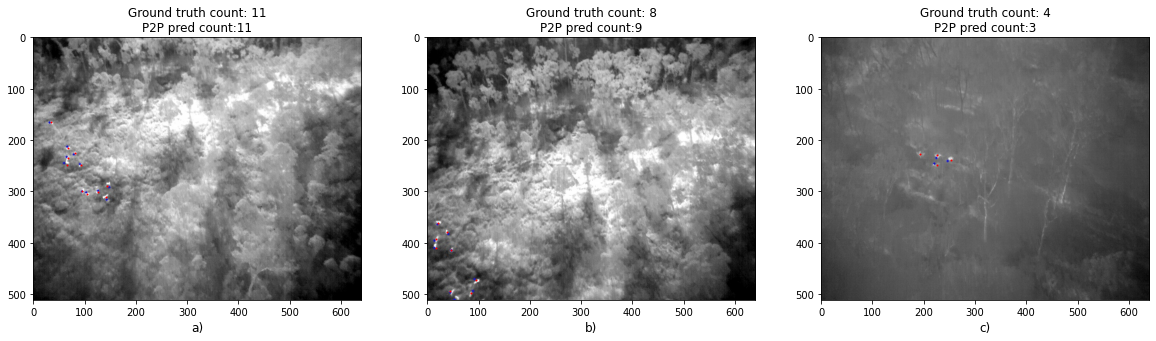

In [116]:
# Plot gt points over p2p output image
fig = plt.figure(figsize=[20,5])
for z in range(len(fnames)):
    ax =fig.add_subplot(1, len(fnames), z+1)
    # plt.imshow(cv2.cvtColor(p2poutputs[z][2], cv2.COLOR_BGR2RGB)) #BGR2RGB
    plt.imshow((p2poutputs[z][2])) #BGR2RGB

    count = 0
    with open(os.path.join(db_dir,"train",fnames[z] + ".txt")) as file:
        for line in file:
            x = int(float(line.split()[1])*640)
            y = int(float(line.split()[2])*512)
            plt.scatter(x, y, c='r', s=1)
            count += 1
    
    plt.title('Ground truth count: {}\nP2P pred count:{}'.format(count,p2poutputs[z][1]))
    plt.xlabel('{})'.format(alphabet_set[z]),fontsize=12)


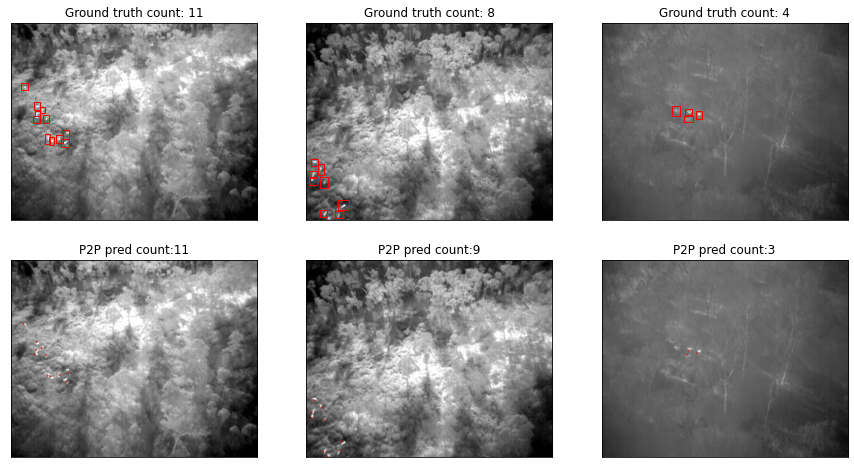

In [117]:
# Plot gt points and p2p output image seperately
fig = plt.figure(figsize=[15,8])
for z in range(len(fnames)):
    img = cv2.imread(os.path.join(db_dir,"train",fnames[z] + ".png"))
    count = 0
            
    ax = fig.add_subplot(2, len(fnames), z+1)
    with open(os.path.join(db_dir,"train",fnames[z] + ".txt")) as file:
        for line in file:
            count += 1
            # To plot co-ords 
            # x = int(float(line.split()[1])*640)
            # y = int(float(line.split()[2])*512)
            # plt.scatter(x, y, c='r', s=1)

            # To plot bounding boxes
            w = int(float(line.split()[3])*640)
            h = int(float(line.split()[4])*512)
            x = int(float(line.split()[1])*640)-w/2
            y = int(float(line.split()[2])*512)-h/2
            rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.title('Ground truth count: {}'.format(count))
    plt.setp(ax, xticks=[], yticks=[])
    plt.imshow(img) 

for z in range(3,6):
    ax = fig.add_subplot(2, len(fnames), z+1)
    plt.imshow(cv2.cvtColor(p2poutputs[z-3][2], cv2.COLOR_BGR2RGB)) #BGR2RGB
    plt.title('P2P pred count:{}'.format(p2poutputs[z-3][1]))
    plt.setp(ax, xticks=[], yticks=[])

# fig.savefig('../../../notebook_test2.png', dpi=350)